In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('after_missing_value_imputation.csv')

In [3]:
df1=df.copy()

In [4]:
pd.set_option('display.max_columns',None)
df1.head()

,brand,price,rating,5g,nfc,ir_blaster,processor_brand,num_cores,processor_speed,ram,memory,battery_capacity,fast_charging_capacity,Fast_charging,screen_size,resolution_width,resolution_height,refresh_rate,Punch_Hole,Notch,primary_camera,front_camera,num_rear_camera,num_front_camera,Extra_storage_supported,os_name,os_version,is_fold
0,oppo,29990,4.70,True,True,True,Dimensity,8,3.10,8.0,256.0,4800.0,67.0,True,6.70,1080.0,2412.0,120.0,True,False,50.0,32.0,3,1,False,Android,14.0,False
1,poco,19999,4.50,True,True,True,Dimensity,8,3.35,12.0,256.0,5500.0,90.0,True,6.67,1220.0,2712.0,120.0,True,False,64.0,16.0,3,1,False,Android,14.0,False
2,xiaomi,31999,4.35,True,True,True,Dimensity,8,2.80,8.0,256.0,5000.0,120.0,True,6.67,1220.0,2712.0,120.0,True,False,200.0,16.0,3,1,False,Android,13.0,False
3,oppo,40990,4.75,True,True,True,Dimensity,8,3.10,12.0,256.0,4600.0,80.0,True,6.74,1240.0,2772.0,120.0,True,False,50.0,32.0,3,1,False,Android,14.0,False
4,xiaomi,33999,4.00,True,True,True,Snapdragon,8,2.40,12.0,256.0,5200.0,120.0,True,6.67,1220.0,2712.0,144.0,True,False,200.0,32.0,3,1,False,Android,13.0,False


We will make one new column ppi from resolution height and resolution width and screen size

In [5]:
df1['ppi']=np.round(np.sqrt(df1['resolution_width']**2 +df1['resolution_height']**2)/df1['screen_size'])

In [6]:
df1.drop(columns=['resolution_width','resolution_height','screen_size'],inplace =True)

We will make one new column from num_cores and processor_speed

In [7]:
df1['processing_power']=np.round((df1['num_cores']*df1['processor_speed']))

In [8]:
df1.drop(columns=['num_cores','processor_speed'],inplace =True)

In [9]:
df1.drop(columns=['is_fold'],inplace =True)

In [10]:
np.round(df1['primary_camera']).skew()

2.204000116834292

In [11]:
df1['refresh_rate'].value_counts()

refresh_rate
120.0    816
90.0     415
144.0    120
165.0     35
60.0       1
Name: count, dtype: int64

In [12]:
# Example bins and labels for battery capacity
bins = [0, 3000, 4000, 5000, float('inf')]
labels = ['Small (<3000 mAh)', 'Medium (3000-4000 mAh)', 'Large (4000-5000 mAh)', 'Very Large (>5000 mAh)']

df1['battery_capacity_bin'] = pd.cut(df1['battery_capacity'], bins=bins, labels=labels)

# Check distribution
print(df1['battery_capacity_bin'].value_counts())


battery_capacity_bin
Large (4000-5000 mAh)     1167
Very Large (>5000 mAh)     180
Medium (3000-4000 mAh)      40
Small (<3000 mAh)            0
Name: count, dtype: int64


In [13]:
df1['fast_charging_capacity'] = df1['fast_charging_capacity'].round(0)

def fast_charge_tier(w):
    if pd.isna(w): 
        return pd.NA
    w = float(w)
    if w <= 15:
        return 'Very Slow (≤15W)'
    elif w <= 25:
        return 'Slow (16–25W)'
    elif w <= 40:
        return 'Mainstream Fast (26–40W)'
    elif w <= 70:
        return 'Upper-Mid Fast (41–70W)'
    elif w <= 110:
        return 'High Fast (71–110W)'
    elif w <= 150:
        return 'Ultra Fast (111–150W)'
    else:
        return 'Extreme (150W+)'

order = [
    'Very Slow (≤15W)',
    'Slow (16–25W)',
    'Mainstream Fast (26–40W)',
    'Upper-Mid Fast (41–70W)',
    'High Fast (71–110W)',
    'Ultra Fast (111–150W)',
    'Extreme (150W+)',
]

df1['fast_charge_tier'] = df1['fast_charging_capacity'].apply(fast_charge_tier).astype('str')

In [14]:
df1.drop(columns=['battery_capacity','fast_charging_capacity'],inplace =True)

In [15]:
bins = [0, 20, 50, 100, 200, float('inf')]
labels = ['Low', 'Mid-Low', 'Mid', 'High', 'Ultra']

df1['primary_camera_cat'] = pd.cut(df1['primary_camera'], bins=bins, labels=labels, right=False)


In [16]:
df1['primary_camera_cat'].value_counts()

primary_camera_cat
Mid        947
High       194
Mid-Low    109
Low         71
Ultra       66
Name: count, dtype: int64

In [17]:
df1.drop(columns=['primary_camera'],inplace =True)

In [18]:
df1.head()

,brand,price,rating,5g,nfc,ir_blaster,processor_brand,ram,memory,Fast_charging,refresh_rate,Punch_Hole,Notch,front_camera,num_rear_camera,num_front_camera,Extra_storage_supported,os_name,os_version,ppi,processing_power,battery_capacity_bin,fast_charge_tier,primary_camera_cat
0,oppo,29990,4.70,True,True,True,Dimensity,8.0,256.0,True,120.0,True,False,32.0,3,1,False,Android,14.0,394.0,25.0,Large (4000-5000 mAh),Upper-Mid Fast (41–70W),Mid
1,poco,19999,4.50,True,True,True,Dimensity,12.0,256.0,True,120.0,True,False,16.0,3,1,False,Android,14.0,446.0,27.0,Very Large (>5000 mAh),High Fast (71–110W),Mid
2,xiaomi,31999,4.35,True,True,True,Dimensity,8.0,256.0,True,120.0,True,False,16.0,3,1,False,Android,13.0,446.0,22.0,Large (4000-5000 mAh),Ultra Fast (111–150W),Ultra
3,oppo,40990,4.75,True,True,True,Dimensity,12.0,256.0,True,120.0,True,False,32.0,3,1,False,Android,14.0,451.0,25.0,Large (4000-5000 mAh),High Fast (71–110W),Mid
4,xiaomi,33999,4.00,True,True,True,Snapdragon,12.0,256.0,True,144.0,True,False,32.0,3,1,False,Android,13.0,446.0,19.0,Very Large (>5000 mAh),Ultra Fast (111–150W),Ultra


In [19]:
df1.shape

(1387, 24)

In [20]:
df1['rating'].var()

0.08167626771277067

In [21]:
df1['num_front_camera'].var()

0.0354435278732319

In [22]:
df1['num_rear_camera'].var()

0.3362203765952901

In [23]:
df1['processing_power'].var()

12.580053288056186

In [24]:
df1['refresh_rate'].var()

339.33304618957743

In [25]:
df1['ir_blaster'].value_counts(normalize=True)

ir_blaster
False    0.750541
True     0.249459
Name: proportion, dtype: float64

In [26]:
pd.set_option('display.max_rows',None)
df1['Fast_charging'].astype('int').var()

0.01352072584949308

In [27]:
df1.drop(columns='Fast_charging',inplace=True)

In [28]:
df1['Extra_storage_supported'].astype('int').var()

0.2501427915991688

In [29]:
df1['5g'].astype('int').var()

0.15820060737147829

#### Trainig Model after Feature Engineering

                    Feature  Importance
17                      ppi    0.343452
18         processing_power    0.227253
11             front_camera    0.073842
0                     brand    0.069932
5           processor_brand    0.044155
15                  os_name    0.038221
7                    memory    0.031142
6                       ram    0.030351
9                Punch_Hole    0.030347
16               os_version    0.021171
12          num_rear_camera    0.020902
1                    rating    0.017096
14  Extra_storage_supported    0.009155
21       primary_camera_cat    0.007810
20         fast_charge_tier    0.007284
8              refresh_rate    0.006698
3                       nfc    0.005759
2                        5g    0.005336
19     battery_capacity_bin    0.004762
13         num_front_camera    0.002605
4                ir_blaster    0.001939
10                    Notch    0.000787


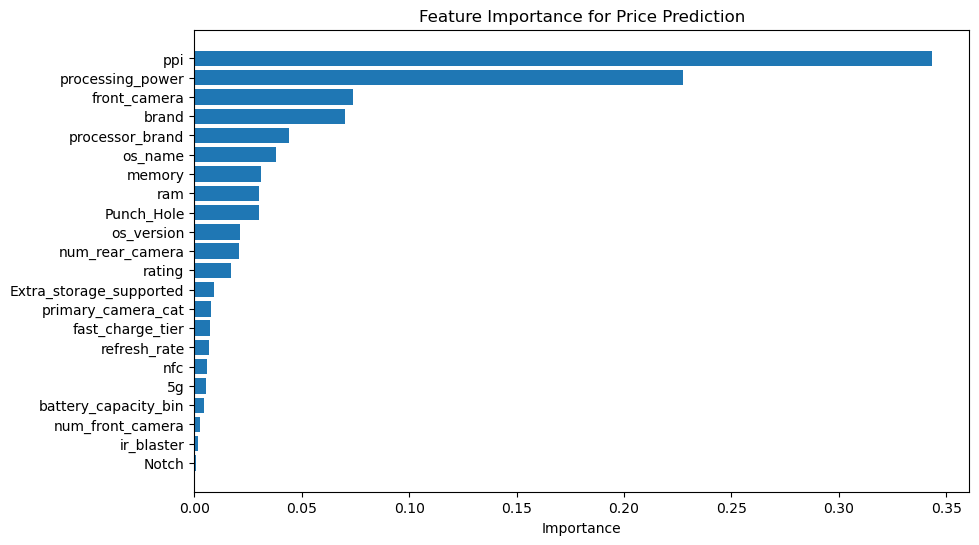

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Copy of dataframe
df2 = df1.copy()

# Separate features and target
X = df2.drop('price', axis=1)
y = df2['price']

# Encode categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feat_importance_df)

# Optional: plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance for Price Prediction')
plt.show()


In [31]:
df1['ppi'].value_counts()

ppi
395.0    168
400.0     83
394.0     66
396.0     63
409.0     60
405.0     59
401.0     49
388.0     48
393.0     45
402.0     44
270.0     39
398.0     38
411.0     38
392.0     36
399.0     33
526.0     32
269.0     26
453.0     24
267.0     22
403.0     21
387.0     21
446.0     19
451.0     18
518.0     17
390.0     17
260.0     15
407.0     15
391.0     10
413.0     10
386.0      9
360.0      9
460.0      9
521.0      9
457.0      8
431.0      8
266.0      8
426.0      7
461.0      6
422.0      6
500.0      6
410.0      6
373.0      6
385.0      5
263.0      5
436.0      5
389.0      5
450.0      5
516.0      4
523.0      4
643.0      4
352.0      4
424.0      4
418.0      4
510.0      4
370.0      4
456.0      4
458.0      3
506.0      3
449.0      3
406.0      3
515.0      3
501.0      3
404.0      3
524.0      2
512.0      2
274.0      2
420.0      2
419.0      2
525.0      2
414.0      2
429.0      2
372.0      2
566.0      2
257.0      2
513.0      2
437.0      2
532.0   

In [32]:
import pandas as pd

# Define bins and labels
bins = [0, 359, 385, 411, 450, 500, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra High']

# Create new binned column
df1['ppi_bin'] = pd.cut(df1['ppi'], bins=bins, labels=labels)

# Check counts
print(df1['ppi_bin'].value_counts())



ppi_bin
Medium        942
Very Low      127
Ultra High    109
High           92
Very High      87
Low            30
Name: count, dtype: int64


In [33]:
# Ensure ppi_bin is categorical
df1['ppi_bin'] = df1['ppi_bin'].astype('category')

# Verify
print(df1['ppi_bin'].dtype)


category


In [34]:
df1.drop(columns='ppi',inplace =True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    1387 non-null   object  
 1   price                    1387 non-null   int64   
 2   rating                   1387 non-null   float64 
 3   5g                       1387 non-null   bool    
 4   nfc                      1387 non-null   bool    
 5   ir_blaster               1387 non-null   bool    
 6   processor_brand          1387 non-null   object  
 7   ram                      1387 non-null   float64 
 8   memory                   1387 non-null   float64 
 9   refresh_rate             1387 non-null   float64 
 10  Punch_Hole               1387 non-null   bool    
 11  Notch                    1387 non-null   bool    
 12  front_camera             1387 non-null   float64 
 13  num_rear_camera          1387 non-null   int64   
 14  num_fron

In [36]:
df1['rating'].value_counts()

rating
4.150000    104
4.200000    102
4.000000     87
4.250000     83
4.050000     82
4.100000     80
4.450000     80
4.300000     77
4.400000     71
4.350000     68
4.550000     65
4.650000     53
4.700000     51
4.750000     49
4.600000     46
4.500000     46
3.950000     38
3.750000     31
3.850000     24
3.900000     21
3.800000     21
3.700000     16
4.252484     12
4.274806      9
3.550000      9
3.650000      7
4.255376      7
4.246237      6
3.600000      5
4.288415      4
4.218391      4
4.313636      3
3.500000      3
3.350000      3
3.450000      3
4.280556      2
3.250000      2
4.200000      2
3.150000      2
4.159375      2
4.292188      2
4.429412      1
3.400000      1
3.200000      1
3.300000      1
3.100000      1
Name: count, dtype: int64

In [37]:
import pandas as pd

# Define a binning function
def bin_rating(x):
    if x < 3.5:
        return 'Very Low'
    elif 3.5 <= x <= 3.8:
        return 'Low'
    elif 3.81 <= x <= 4.1:
        return 'Medium'
    elif 4.11 <= x <= 4.4:
        return 'High'
    else:  # x > 4.4
        return 'Very High'

# Apply the function
df1['rating_bin'] = df1['rating'].apply(bin_rating)

# Convert to categorical
df1['rating_bin'] = df1['rating_bin'].astype('category')

# Check counts
print(df1['rating_bin'].value_counts())


rating_bin
High         558
Very High    391
Medium       332
Low           92
Very Low      14
Name: count, dtype: int64


In [38]:
df1['refresh_rate'].value_counts()

refresh_rate
120.0    816
90.0     415
144.0    120
165.0     35
60.0       1
Name: count, dtype: int64

In [39]:
df1['ram'].value_counts()

ram
8.0     636
6.0     277
12.0    268
4.0     157
16.0     37
3.0       6
18.0      5
24.0      1
Name: count, dtype: int64

In [40]:
df1['memory'].value_counts()

memory
128.0     762
256.0     445
64.0      117
512.0      48
1024.0     11
32.0        4
Name: count, dtype: int64

In [41]:
df1['processing_power'].value_counts()

processing_power
18.0    284
26.0    243
19.0    238
16.0    119
24.0    117
23.0    115
21.0     81
22.0     60
20.0     45
25.0     24
27.0     22
14.0     14
13.0     12
28.0      5
15.0      4
17.0      3
35.0      1
Name: count, dtype: int64

In [42]:
# Define binning function
def bin_processing_power(x):
    if x <= 15:
        return 'Very Low'
    elif 16 <= x <= 19:
        return 'Low'
    elif 20 <= x <= 23:
        return 'Medium'
    elif 24 <= x <= 26:
        return 'High'
    else:  # x >= 27
        return 'Very High'

# Apply to dataframe
df1['processing_power_bin'] = df1['processing_power'].apply(bin_processing_power)

# Convert to categorical
df1['processing_power_bin'] = df1['processing_power_bin'].astype('category')

# Check counts
print(df1['processing_power_bin'].value_counts())


processing_power_bin
Low          644
High         384
Medium       301
Very Low      30
Very High     28
Name: count, dtype: int64


In [43]:
df1.drop(columns=['rating','processing_power'],inplace =True)

In [44]:
def bin_front_camera(x):
    if x <= 8:
        return 'Low'
    elif 8 < x <= 12:
        return 'Medium'
    elif 12 < x <= 24:
        return 'High'
    else:  # >24
        return 'Very High'

df1['front_camera_bin'] = df1['front_camera'].apply(bin_front_camera).astype('category')


In [45]:
df1.drop(columns=['front_camera'],inplace =True)

In [46]:
df2=df1.copy()

In [47]:
bool_cols = ['5g','nfc','ir_blaster','Punch_Hole','Notch','Extra_storage_supported']
df1[bool_cols] = df1[bool_cols].astype(int)


In [48]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['battery_capacity_bin','primary_camera_cat','ppi_bin','rating_bin','processing_power_bin','front_camera_bin']
for col in cat_cols:
    df1[col] = LabelEncoder().fit_transform(df1[col])


In [49]:
obj_cols = ['brand','processor_brand','os_name','fast_charge_tier']
for col in obj_cols:
    df1[col] = LabelEncoder().fit_transform(df1[col])


In [50]:
df1.head()

,brand,price,5g,nfc,ir_blaster,processor_brand,ram,memory,refresh_rate,Punch_Hole,Notch,num_rear_camera,num_front_camera,Extra_storage_supported,os_name,os_version,battery_capacity_bin,fast_charge_tier,primary_camera_cat,ppi_bin,rating_bin,processing_power_bin,front_camera_bin
0,14,29990,1,1,1,1,8.0,256.0,120.0,1,0,3,1,0,0,14.0,0,5,2,2,3,0,3
1,16,19999,1,1,1,1,12.0,256.0,120.0,1,0,3,1,0,0,14.0,2,1,2,0,3,3,0
2,22,31999,1,1,1,1,8.0,256.0,120.0,1,0,3,1,0,0,13.0,0,4,4,0,0,2,0
3,14,40990,1,1,1,1,12.0,256.0,120.0,1,0,3,1,0,0,14.0,0,1,2,4,3,0,3
4,22,33999,1,1,1,5,12.0,256.0,144.0,1,0,3,1,0,0,13.0,2,4,4,0,2,1,3


                    Feature  Importance
5                       ram    0.161830
0                     brand    0.151594
4           processor_brand    0.117101
12  Extra_storage_supported    0.114431
21         front_camera_bin    0.083489
13                  os_name    0.060721
6                    memory    0.050389
18                  ppi_bin    0.043075
11         num_front_camera    0.043013
20     processing_power_bin    0.035153
10          num_rear_camera    0.029895
2                       nfc    0.022326
14               os_version    0.019634
16         fast_charge_tier    0.012430
8                Punch_Hole    0.012095
19               rating_bin    0.008965
7              refresh_rate    0.008808
17       primary_camera_cat    0.007672
15     battery_capacity_bin    0.006329
3                ir_blaster    0.005197
1                        5g    0.005083
9                     Notch    0.000769


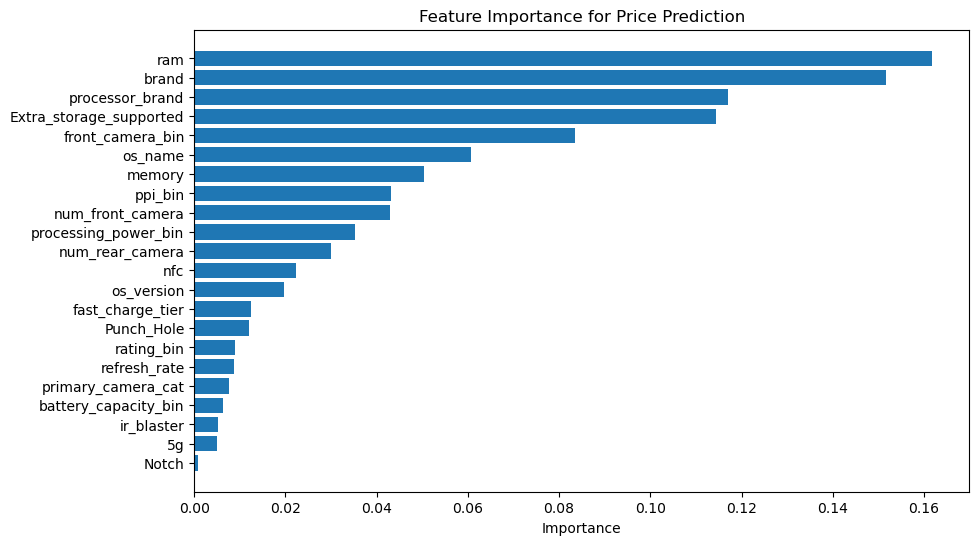

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Separate features and target
X = df1.drop('price', axis=1)
y = df1['price']
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feat_importance_df)

# Optional: plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance for Price Prediction')
plt.show()


In [52]:
corr_matrix = df1.corr()
corr_with_target = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_target)


price                      1.000000
memory                     0.605171
ram                        0.503460
nfc                        0.487714
refresh_rate               0.406845
os_name                    0.403502
os_version                 0.352372
front_camera_bin           0.340546
5g                         0.321597
num_front_camera           0.284446
num_rear_camera            0.210070
primary_camera_cat         0.120973
fast_charge_tier           0.099054
processor_brand            0.073043
battery_capacity_bin       0.042578
ppi_bin                    0.001797
Punch_Hole                -0.039483
ir_blaster                -0.052695
rating_bin                -0.090195
processing_power_bin      -0.097986
Notch                     -0.216487
brand                     -0.237489
Extra_storage_supported   -0.508734
Name: price, dtype: float64


In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    1387 non-null   object  
 1   price                    1387 non-null   int64   
 2   5g                       1387 non-null   bool    
 3   nfc                      1387 non-null   bool    
 4   ir_blaster               1387 non-null   bool    
 5   processor_brand          1387 non-null   object  
 6   ram                      1387 non-null   float64 
 7   memory                   1387 non-null   float64 
 8   refresh_rate             1387 non-null   float64 
 9   Punch_Hole               1387 non-null   bool    
 10  Notch                    1387 non-null   bool    
 11  num_rear_camera          1387 non-null   int64   
 12  num_front_camera         1387 non-null   int64   
 13  Extra_storage_supported  1387 non-null   bool    
 14  os_name 

In [127]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Copy dataframe
df = df2.copy()

# -----------------------
# Boolean encoding
# -----------------------
bool_cols = ['5g','nfc','ir_blaster','Punch_Hole','Notch','Extra_storage_supported']
for col in bool_cols:
    df[col] = df[col].astype(int)

# -----------------------
# Category / Binned features encoding
# -----------------------
cat_label_cols = ['processing_power_bin','front_camera_bin','rating_bin','ppi_bin','primary_camera_cat','battery_capacity_bin','os_name']
for col in cat_label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# -----------------------
# Target encoding for high-cardinality object features
# -----------------------
target_cols = ['brand','processor_brand','fast_charge_tier']
for col in target_cols:
    df[col] = df.groupby(col)['price'].transform('mean')

# -----------------------
# Define X and y
# -----------------------
features = [
    'ram','memory','refresh_rate','num_rear_camera','num_front_camera',
    'os_version','5g','nfc','ir_blaster','Punch_Hole','Extra_storage_supported',
    'processing_power_bin','front_camera_bin',
    'os_name','brand','processor_brand','fast_charge_tier'
]

X = df[features]
y = np.log(df['price'])

# -----------------------
# Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# Train XGBoost
# -----------------------
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# -----------------------
# Evaluate performance
# -----------------------
y_pred_log = xgb.predict(X_test)
y_pred = np.exp(y_pred_log)
y_test_orig = np.exp(y_test)

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
r2 = r2_score(y_test_orig, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# -----------------------
# Feature importance
# -----------------------
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)

# -----------------------
# Correlation with price after encoding
# -----------------------
corr_with_price = pd.concat([X, np.exp(y)], axis=1).corr()['price'].sort_values(ascending=False)
print(corr_with_price)


RMSE: 8546.09
R2 Score: 0.9200
                    Feature  Importance
10  Extra_storage_supported    0.408778
7                       nfc    0.104261
13                  os_name    0.097179
12         front_camera_bin    0.073748
14                    brand    0.044481
6                        5g    0.042661
11     processing_power_bin    0.041859
1                    memory    0.036963
15          processor_brand    0.032979
0                       ram    0.029025
4          num_front_camera    0.023183
9                Punch_Hole    0.013591
16         fast_charge_tier    0.013216
3           num_rear_camera    0.011689
2              refresh_rate    0.011399
5                os_version    0.007605
8                ir_blaster    0.007382
price                      1.000000
brand                      0.651665
processor_brand            0.606852
memory                     0.605171
ram                        0.503460
nfc                        0.487714
refresh_rate               0.4068

In [166]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define XGBoost
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.5,
    random_state=42
)

# Perform 5-fold CV with RMSE scoring
cv_scores = cross_val_score(
    xgb, X, y,
    cv=5,
    scoring='neg_root_mean_squared_error',  # returns negative RMSE
    n_jobs=-1
)

# Convert to positive RMSE
rmse_scores = -cv_scores
print("RMSE for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std RMSE:", rmse_scores.std())


RMSE for each fold: [0.25350521 0.23527451 0.24870619 0.17264829 0.24840521]
Mean RMSE: 0.23170787956829267
Std RMSE: 0.030145060378816636


In [174]:
# Suppose y is actual price and log-RMSE is from cross-validation
log_rmse_mean = 0.23170787956829267

#  Approximate RMSE in price scale (multiplicative factor)
price_scale_rmse = np.exp(log_rmse_mean)
print("Approximate RMSE in price scale (factor):", price_scale_rmse)

#  Absolute RMSE in ₹ (example using actual prices)
# y = df2['price']  # actual prices
# Absolute RMSE ≈ multiplicative factor * mean price
mean_price = df['price'].mean()
absolute_rmse = (price_scale_rmse - 1) * mean_price
print("Approximate RMSE in ₹:", absolute_rmse)


Approximate RMSE in price scale (factor): 1.2607513837918845
Approximate RMSE in ₹: 9630.222195509365


#### Final result
##### 1.RMSE: 8546.09

##### 2.R2 Score: 0.9200